In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
titanic_df = pd.read_csv('titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
titanic_df["Age"].fillna(round(titanic_df['Age'].mean(),6), inplace= True)

In [8]:
titanic_df["Fare"].fillna(titanic_df['Fare'].mean(), inplace= True)

In [9]:
titanic_df.drop(columns=["PassengerId", "Name" ,"Ticket","Cabin"],inplace=True)

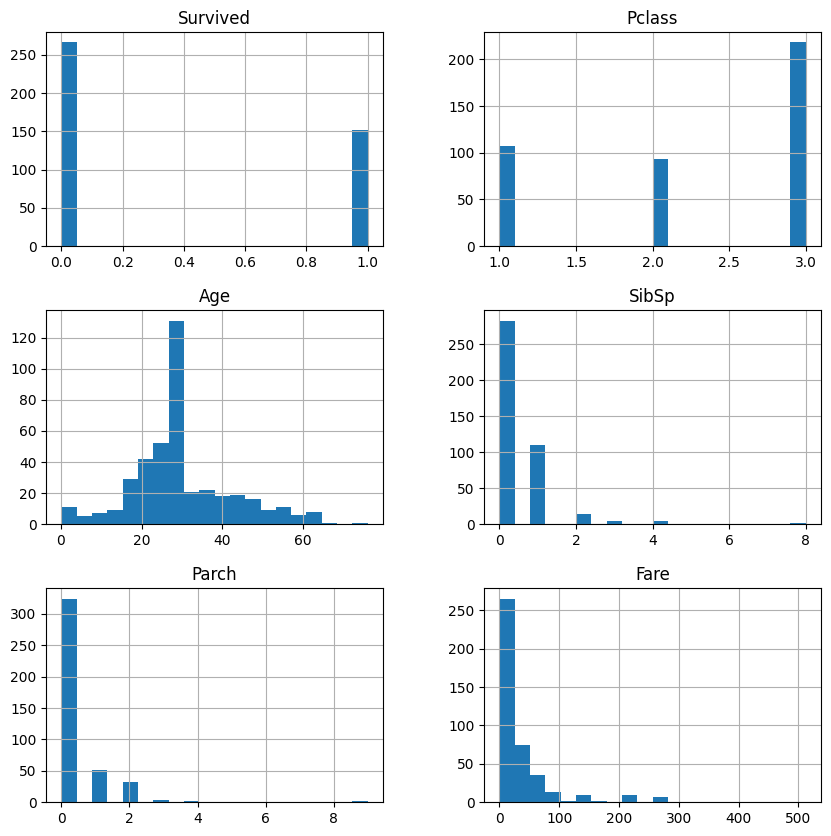

In [10]:
titanic_df.hist(figsize=(10,10),bins=20)
plt.show()

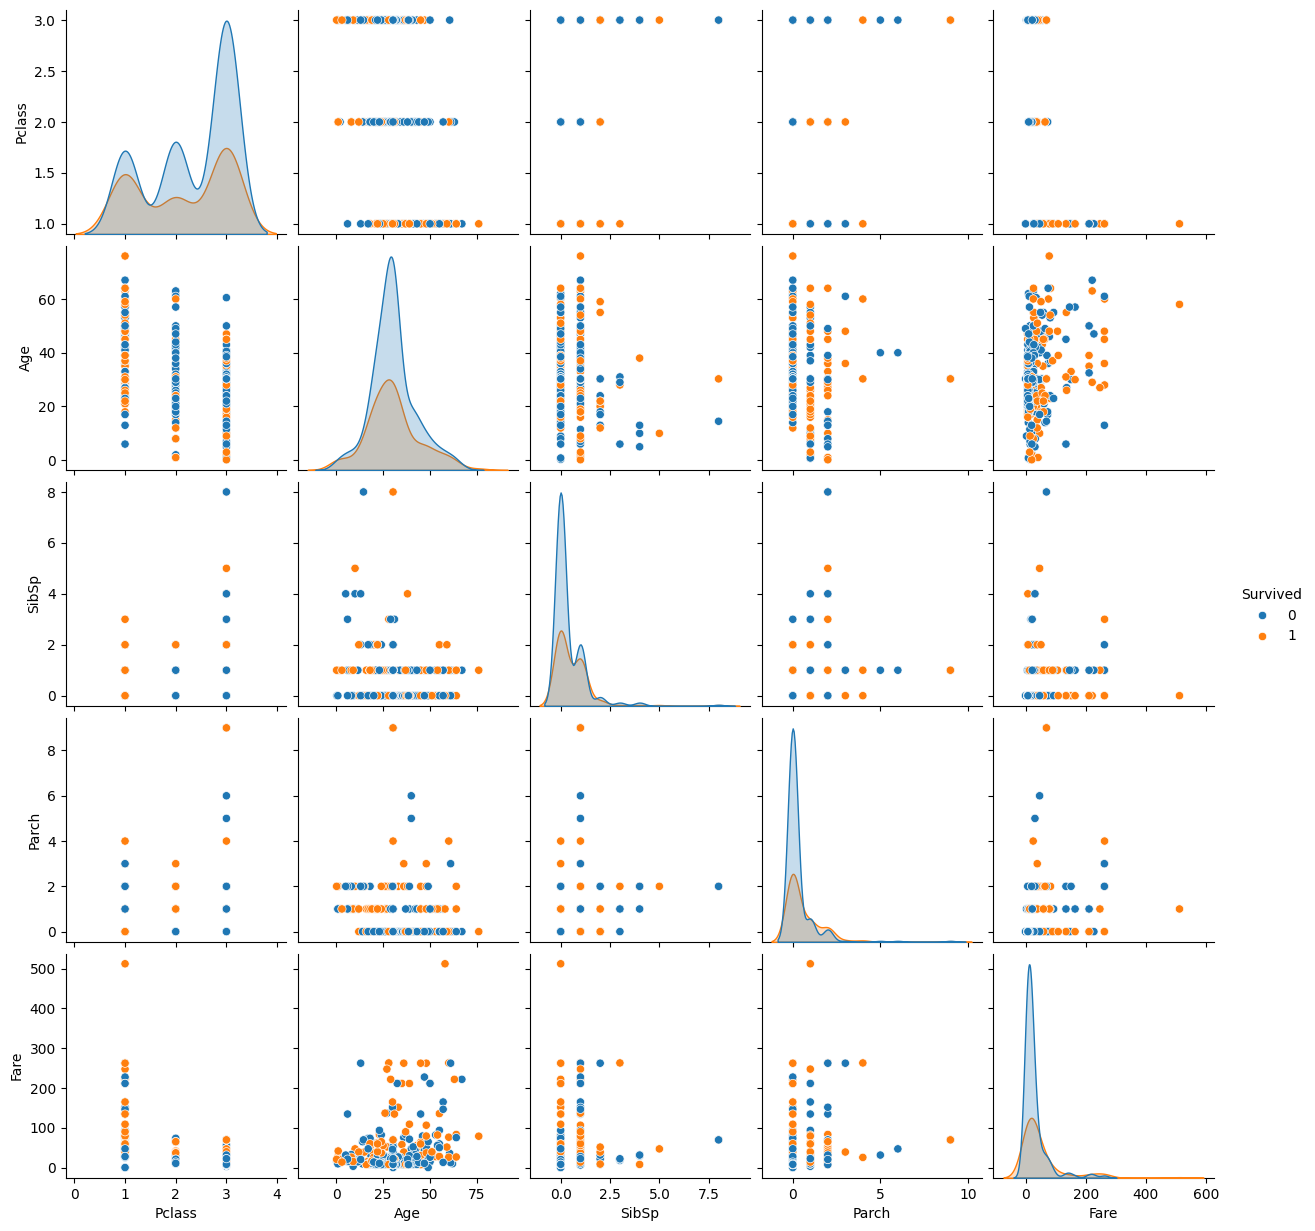

In [11]:
sns.pairplot(data=titanic_df,hue="Survived")
plt.show()

In [12]:
LE = LabelEncoder()
titanic_df["Sex"] = LE.fit_transform(titanic_df['Sex'])

In [13]:
titanic_df = pd.get_dummies(titanic_df, columns=["Embarked"], drop_first=True)

In [14]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,34.50000,0,0,7.8292,True,False
1,1,3,0,47.00000,1,0,7.0000,False,True
2,0,2,1,62.00000,0,0,9.6875,True,False
3,0,3,1,27.00000,0,0,8.6625,False,True
4,1,3,0,22.00000,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,False,True
414,1,1,0,39.00000,0,0,108.9000,False,False
415,0,3,1,38.50000,0,0,7.2500,False,True
416,0,3,1,30.27259,0,0,8.0500,False,True


In [15]:
titanic_df["Embarked_Q"]=titanic_df["Embarked_Q"].astype("int64")
titanic_df["Embarked_S"]=titanic_df["Embarked_S"].astype("int64")

In [16]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,34.50000,0,0,7.8292,1,0
1,1,3,0,47.00000,1,0,7.0000,0,1
2,0,2,1,62.00000,0,0,9.6875,1,0
3,0,3,1,27.00000,0,0,8.6625,0,1
4,1,3,0,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,0,1
414,1,1,0,39.00000,0,0,108.9000,0,0
415,0,3,1,38.50000,0,0,7.2500,0,1
416,0,3,1,30.27259,0,0,8.0500,0,1


In [17]:
SS = StandardScaler()
titanic_df[["Age","Fare"]] = SS.fit_transform(titanic_df[["Age","Fare"]])

In [18]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,3.349926e-01,0,0,-0.498407,1,0
1,1,3,0,1.325530e+00,1,0,-0.513274,0,1
2,0,2,1,2.514175e+00,0,0,-0.465088,1,0
3,0,3,1,-2.593299e-01,0,0,-0.483466,0,1
4,1,3,0,-6.555448e-01,1,1,-0.418471,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,1,-2.274918e-08,0,0,-0.494448,0,1
414,1,1,0,6.915861e-01,0,0,1.313753,0,0
415,0,3,1,6.519646e-01,0,0,-0.508792,0,1
416,0,3,1,-2.274918e-08,0,0,-0.494448,0,1


In [19]:
X = titanic_df.drop(columns=["Survived"])

In [20]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,0.334993,0,0,-0.498407,1,0
1,3,0,1.325530,1,0,-0.513274,0,1
2,2,1,2.514175,0,0,-0.465088,1,0
3,3,1,-0.259330,0,0,-0.483466,0,1
4,3,0,-0.655545,1,1,-0.418471,0,1


In [21]:
Y = titanic_df[["Survived"]]

In [22]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(x_test)

In [32]:
print(f"Accuracy:{accuracy_score(y_pred,y_test)*100}%")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy:100.0%
Confusion Matrix:
 [[50  0]
 [ 0 34]]


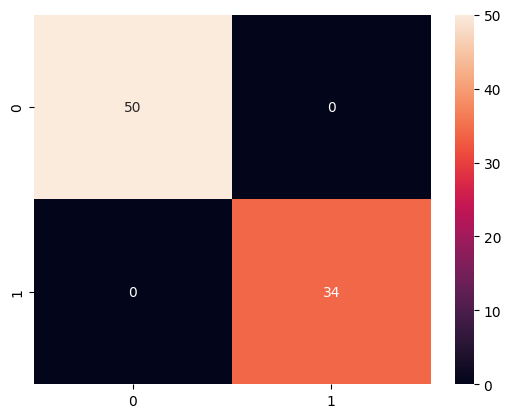

In [34]:
sns.heatmap(cm,annot=True)
plt.show()